# Data Argumentation
A common problem, is the amount of data available to enter the models, for models to present the expected results it is necessary for training to occur with a large amount of data (dataset), but in many cases the data needed to perform these tasks is not available.
This is where the **Data Augmentation** technique comes in that, as the name suggests, allows us to augment our dataset in two ways:




*   Introducing disturbances in the original data. For example: taking an original image centered, we replicate it off-center, reversing axes…
*   Using different distributions. Example: if we want to train a model to classify high-resolution images, we add low-resolution images, with noise… always maintaining the highest high-resolution ratio.



At first, neural networks are not intelligent. For example, a poorly trained neural network would think that these three tennis balls shown below are distinct and unique images.

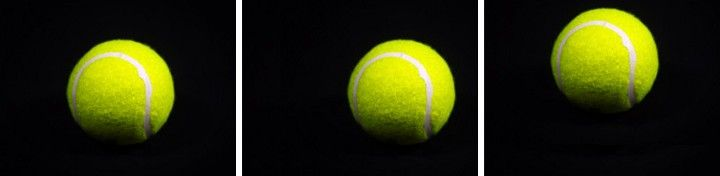



The same ball with some translations.



So if we work with images, it is only necessary to make some small alterations to our dataset and we can achieve our goal.
There are many ways to augment data with images, such as:


1.   Turn around (Flip)
2.   Rotation

1.   Scale
2.   Cutout

1.   Traslation
2.   Gaussian noise









The Keras library provides the ability to use data augmentation automatically when training a model.
This is accomplished by using the ImageDataGenerator class.
A variety of techniques are supported, as well as pixel scaling methods, such as:



*   The changes in the image (translations) through the arguments **width_shift_range** y **height_shift_range**.
*  Turning the image around using the arguments **horizontal_flip** y **vertical_flip**.
*   Image rotations through storyline **rotation_range**
*   Image brightness using the argument **brightness_range**.
*   Image zoom using the argument **zoom_range**.

Let's independently look at examples of images after they have been magnified. It is common to use a variety of augmentation techniques at the same time during training.


In [ ]:
import matplotlib.pyplot as plt    #Library that allows graphing, very MATLAB style
import numpy as np                  #Library that allows working with arrangement  
from numpy import expand_dims       #Expand the array shape 
from keras.preprocessing.image import load_img    #From the Keras library for data augmentation, we load the image in the python image library (PIL) format
from keras.preprocessing.image import img_to_array #will take a picture (PIL) and convert it to a matrix. If part of a PNG image, the values within the image will be between 0 and 255.
from keras.preprocessing.image import ImageDataGenerator #will take a picture (PIL) and convert it to a matrix. If part of a PNG image, the values within the image will be between 0 and 255.
from PIL import Image #python images library
from urllib.request import urlopen #it allows to read an URL

First we upload an image from the internet

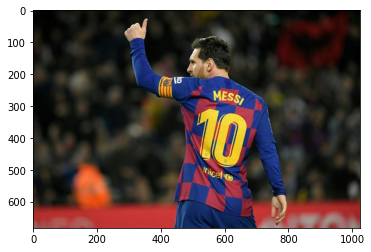

In [ ]:
url = 'https://s1.ibtimes.com/sites/www.ibtimes.com/files/styles/full/public/2020/03/30/barcelona-captain-lionel-messi-confirmed-the-players-will.jpg'
filename = urlopen(url)
img = Image.open(filename)
plt.imshow(img)

Let's start with a makeover which means moving all the pixels in the image in one direction, such as horizontally or vertically, while keeping the same image dimensions.

The width_shift_range and height_shift_range arguments of the ImageDataGenerator constructor control the amount of horizontal and vertical scrolling respectively.


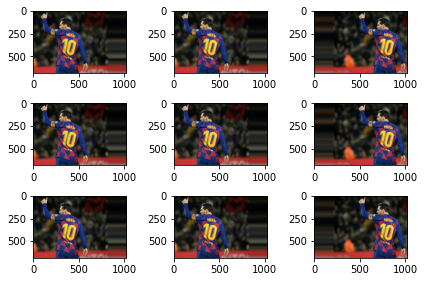

In [ ]:
# let´s convert the image into a un setting
data = img_to_array(img)
# perform an expansion to a sample 
samples = expand_dims(data, 0)
# we create the data increaser using only the change of image 
datagen = ImageDataGenerator(width_shift_range=[-200,200])
# let´s prepare the iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and show the results
for i in range(9):
	plt.subplot(330 + 1 + i)
	# images plots are generated
	batch = it.next()
	image = batch[0].astype('uint8') #se convierte a un valor valido para poder mostrarlo como imagen 
	plt.imshow(image)
	plt.tight_layout()
plt.show()

a flip of image means turning the rows and columns of pixels in the case of a vertical or horizontal flip, respectivily.
the increasing is specified through a boolean argument **horizontal_flip** or **vertical_flip** for the class of **ImageDataGenerator**.

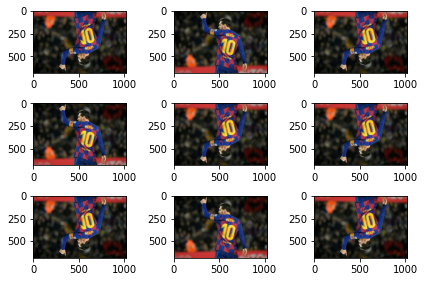

In [ ]:
datagen = ImageDataGenerator(vertical_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

the quantity of zoom is sampled evenly ramdom of the zoom region for each dimension (width, height) separately.

floating or [lower limt, upper limit]. Range for random zoom. if it is floating, [lower limit, upper limit] = [1-zoom_range, 1 + zoom_range]

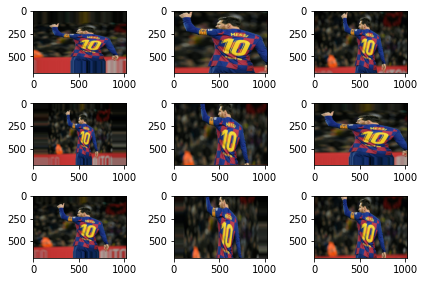

In [ ]:
datagen = ImageDataGenerator(zoom_range=0.6) #float o Range [lower,upper]
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

the image is rotated randomly clockwise a determined number of degrees from 0 to 360. it is probable that rotate the pixels out from the frame of the image and leave of the frame without pixel data, that must be completed.

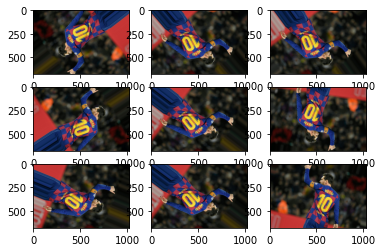

In [ ]:
datagen = ImageDataGenerator(rotation_range=250)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

the combination of these techniques let us increase the quantity of data of the dataset to de used, in many jobs it is an increasing of data is used to increase the quantity of entertaiment images and improve the precision of work.


              featurewise_center: Boolean, put the median of each element en in cero of all data.
              samplewise_center**: Boolean, put the median of each sample in cero
              featurewise_std_normalization: Boolean, Divide the entrances by the standar deviation (std.) of the dataset, according to the characteristics.
              samplewise_std_normalization: Boolean, divide each data by its std.
              zca_epsilon: the predetermined data is from 1e-6.
              zca_whitening: Boolean, indicates if whitening ZCA is applied       
              tf.image.adjust_saturation: saturate an image by providing a saturation factor.
              tf.image.adjust_brightness: change the brightness of image by providing a brightness factor
              tf.image.rgb_to_grayscale: Grayscale an image.
              tf.image.central_crop: Crop the image from center up to the image part you desire.
              tf.image.flip_left_right: Flip the image either vertically or horizontally


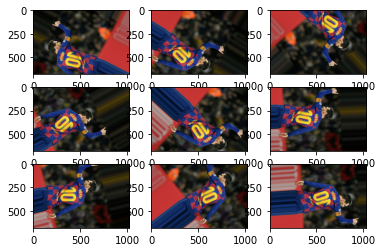

In [ ]:
datagen = ImageDataGenerator(
            rotation_range               = 150,
            width_shift_range            = [100,100],   
            height_shift_range           = [100,100],   
            horizontal_flip              = True,   
            vertical_flip                = True)  
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

Now, we consider words, the necesary work is not so easy due to the inherent complexity of the language, we can not replace each word by its synonym, even if we do not do it we have the risk that the meaning of the sentence changes completely.
There are some lybraries which can help us to do this task, we will start analyzing the following:


1.   Text Attack
2.   Google Trans

# TextAttack
It is a framework from Python to adversary attacks, training of adversaries and increase of data in NLP. We will be focussed in the increasing of data.

In [1]:
!pip install textattack

     |████████████████████████████████| 327kB 5.8MB/s 
     |████████████████████████████████| 61kB 5.4MB/s 
     |████████████████████████████████| 102kB 7.0MB/s 
     |████████████████████████████████| 153kB 12.0MB/s 
     |████████████████████████████████| 778kB 14.0MB/s 
     |████████████████████████████████| 3.0MB 24.3MB/s 
     |████████████████████████████████| 1.1MB 69.3MB/s 
     |████████████████████████████████| 1.7MB 56.4MB/s 
     |████████████████████████████████| 686kB 61.6MB/s 
     |████████████████████████████████| 235kB 70.8MB/s 
     |████████████████████████████████| 61kB 9.0MB/s 
     |████████████████████████████████| 317kB 71.7MB/s 
     |████████████████████████████████| 245kB 68.7MB/s 
     |████████████████████████████████| 245kB 64.1MB/s 
     |████████████████████████████████| 17.3MB 246kB/s 
     |████████████████████████████████| 1.1MB 57.9MB/s 
     |████████████████████████████████| 890kB 18.9MB/s 
     |████████████████████████████████| 122kB 69.1MB/s

In [2]:
from textattack.augmentation import WordNetAugmenter, EmbeddingAugmenter, EasyDataAugmenter, CharSwapAugmenter

textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


2020-10-16 16:01:00 INFO: Downloading default packages for language: en (English)...
2020-10-16 16:03:09 INFO: Finished downloading models and saved to /root/stanza_resources.
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [5]:
text = "Even if i am not with you physically, i will always be by your side watching you grow in body and soul"

TextAttack give us four methods for increasing of data.


## WordNetAugmenter
Increases the text replacing it with synonyms form the tesauro (synonym dictionary) of WordNet.

WordNet is a lexical database from english. The nouns, verbs, adjectives and adverbs are grouped in sets of cognetive synonyms (synsets), each one expresses a different concept.
WordNet is equal superficially to a tesauro since it groups the words depending on its meaning.



In [6]:
aug = WordNetAugmenter();
aug.augment(text)

['Even if i am not with you physically, i will always be by your side watching you grow in consistence and mortal']


## EmbeddingAugmenter
 Increases the text transforming words with their scales, with a restriction to guarantee that their similarity of cosine is at least 0,8.


In [7]:
aug = EmbeddingAugmenter();
aug.augment(text)

textattack: Downloading https://textattack.s3.amazonaws.com/word_embeddings/paragramcf.
100%|██████████| 481M/481M [00:17<00:00, 27.6MB/s]
textattack: Unzipping file /root/.cache/textattack/tmppcqw984h.zip to /root/.cache/textattack/word_embeddings/paragramcf.
textattack: Successfully saved word_embeddings/paragramcf to cache.


['Even if i am not with you materially, i will permanently be by your side watching you grow in body and soul']

## CharSwapAugmenter
Increases the text sustituting, eliminating, inserting and exchanging adjacent characters.

In [8]:
aug = CharSwapAugmenter()
aug.augment(text)

['Even if i am not with you physically, i will always be by your side watchZng you gow in body and soul']


## EasyDataAugmenter
This increases the text with a combination of replacing synonyms from Wordnet, elimination of words, changes of the word order and intersections of synonyms. All these functionalities occur in a random way, so we will get different results each time we run/execute the code. This brings back four increased results, differing from the other methods.


In [9]:
aug = EasyDataAugmenter()
aug.augment(text)

['Even if i raise am not with you physically, i will incline always be by your side watching you grow in body and soul',
 'and watching i am not with you physically, i will always be by your side if you grow in body Even soul',
 'Even if i am not with you physically, i will always be by your face watching you originate in body and soul',
 'Even if i am with you physically, i will always be by your watching you grow in body and soul']

Googletrans  uses the API Ajax from Google Translate for the detection and translation of languages.

The key parameters for the method **translate ()** are:



1.   **src**: language origin. This parameter is optional because **googletrans** will detect it.
2.   **dest**: language´s destination. obligatory parameter.

1.   **text**: the text that is going to de translated from the language´s origen to the language´s destination. Obligatory parameter.





 



When usign this method what happens is a re-trasnlation, we past from the original language to a language destination and then we come back to the original one, during this re-translation, there is a slight change in the sentence between the original text and the re-tanslated one. However, the general signification of the sentence is still preserved.

The supported languages can be consulted at: https://cloud.google.com/translate/docs/languages?hl=es

To get the best results is recommended doing some tests with the languages, if the destination language is very similar the translation does not lose information. However, you can have the problem that the translation might be so literal, this becomes a little a problem of try and failure.


Some examples of languages are:


*   Afrikáans	'af'

*   Chinese (simplified) 	'zh-CN o zh'

*   Esperanto	'eo'

*   Japanese	'ja'
*   Latin	'la'


*   Spanish	'es'


*   Turcomano	'tk'


*   Yiddish	'yi'

*   Zulú	'zu'
*   arab  'ar'
*   dutch  'nl'
*   french  'fr'
*   german  'de'


In [10]:
!pip install googletrans

     |████████████████████████████████| 61kB 4.8MB/s 
     |████████████████████████████████| 972kB 13.8MB/s 
     |████████████████████████████████| 51kB 6.5MB/s 
     |████████████████████████████████| 61kB 9.8MB/s 
     |████████████████████████████████| 71kB 10.0MB/s 
     |████████████████████████████████| 102kB 10.9MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=9cd2a280a18c1f599b5ac921445cfc70b5c408b4512305a8dc0f417cc90c7379
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=45471581b97c291d8596ac762c0edaa4cd7187a0f8264e20959cd64708b0c907
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [11]:
from googletrans import Translator
translator = Translator()

In [13]:
origin_text = "to be or not to be, that is the question"
text_trans = translator.translate(text=origin_text, dest='de').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

to be or not to be, that is the question
sein oder nicht sein, das ist die Frage
to be or not to be, that is the question


In [15]:
origin_text = "to be or not to be, that is the question."
text_trans = translator.translate(text=origin_text, dest='ar').text
final=translator.translate(text=text_trans, dest='es').text
print(origin_text)
print(text_trans)
print(final)

to be or not to be, that is the question.
أكون أو لا أكون ، هذا هو السؤال.
Ser o no ser esa es la cuestión.


In [16]:
origin_text = "maybe in another life i would be your man"
text_trans = translator.translate(text=origin_text, dest='ja').text
final=translator.translate(text=text_trans, dest='fr').text
print(origin_text)
print(text_trans)
print(final)

maybe in another life i would be your man
多分別の人生で私はあなたの男になるでしょう
Peut-être que dans une autre vie je serai ton homme
